In [1]:
import sys
sys.path.insert(0,"/Library/Python/2.7/site-packages")
#sys.path

import numpy as np
import scipy as sp
import pandas as pd
#print np.__version__
#print np.__file__

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
from matplotlib import rcParams
#from matplotlib.dates import YearLocator, MonthLocator, DayLocator, DateFormatter
import matplotlib.dates as mdates
import matplotlib.collections as mplcoll
import matplotlib.colors as mplcolor
#print mpl.__version__
#print mpl.__file__

import json
from operator import itemgetter
%matplotlib inline

import datetime as DT

import MySQLdb

##  Load Generic Functions

In [2]:
%run 'new_user_activation_funcs.ipynb'

## Load Data

In [3]:

#thisDF = grabDF_new_users_daily("2016-01-01", "2016-07-01")
thisDF = grabDF_new_users_daily("2016-01-01", "2016-06-06")

startday = thisDF.iloc[0].day
print startday
thislen = len(thisDF.index)
print thislen
#thisDF['newday'] = pd.date_range(start=startday,periods=thislen,freq='D')
#thisDF.index = pd.date_range(start=startday,periods=thislen,freq='D')

#thisDF.set_index('day')

#
# this was me trying to play with date stuff to fix below error ... but to no avail ....
#
#newDF = thisDF.set_index('day')
#newDF = thisDF.set_index('newday')
#newDF.index.inferred_freq = 'D'
#newDF.index.freq = 'D'
#print newDF.head()
#print newDF.dtypes
#print newDF.index
#print newDF.index.freq

grabbed new users from:  2016-01-01  to  2016-06-06
2016-01-01 00:00:00
158


         day  NewUsers  daynum iDOW iWOY       ExpMA7     delta  DOWcorr  \
0 2016-01-01      6924       0    5   00  6924.000000  0.000000    1.020   
1 2016-01-02      7119       1    6   00  7026.323335  0.013190    0.991   
2 2016-01-03      7367       2    0   00  7151.293727  0.030163    0.925   
3 2016-01-04      7323       3    1   01  7200.790266  0.016972    0.960   
4 2016-01-05      7179       4    2   01  7195.529466 -0.002297    0.988   

         Pred1  
0  7062.480000  
1  6963.086425  
2  6614.946697  
3  6912.758655  
4  7109.183112  


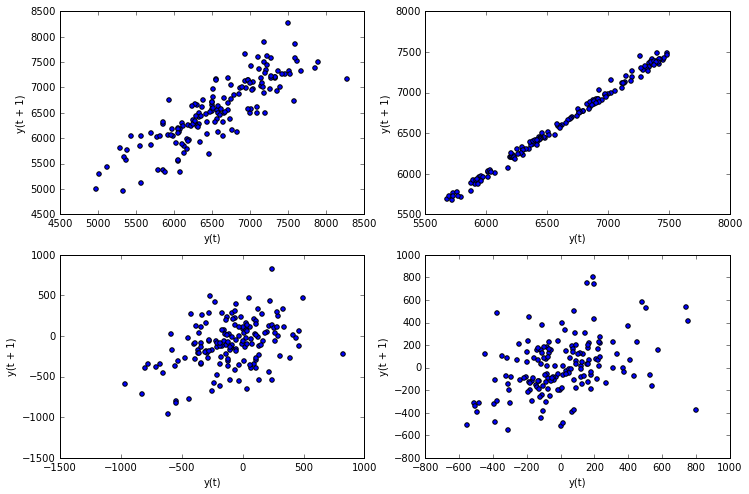

In [4]:
print thisDF.head()
#thisDF['NewUsers'].plot()

fig = plt.figure( figsize = (12.,8.))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

from pandas.tools.plotting import lag_plot

lag_plot(thisDF['NewUsers'], ax=ax1)
lag_plot(thisDF['ExpMA7'], ax=ax2)
lag_plot(thisDF['NewUsers'] - thisDF['ExpMA7'], ax=ax3)
lag_plot(thisDF['NewUsers'] - thisDF['Pred1'], ax=ax4)